In [1]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 4.8 MB/s eta 0:00:00


Total MST length: 24.78 km


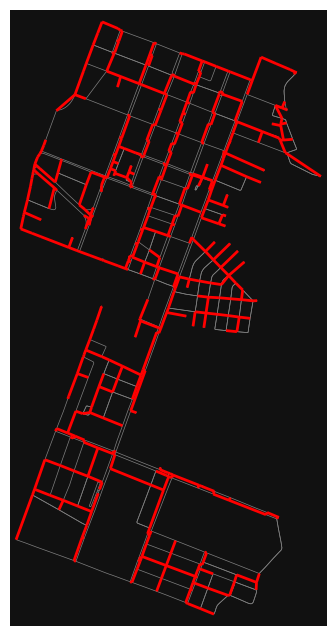

In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# 1. Download the road network for the Tirol neighborhood using OSMnx
place = "Tirol, Natal, Brazil"  # Specify the location (Tirol, Natal)
G = ox.graph_from_place(place, network_type="drive")

# 2. Convert the road network to an undirected graph
G_undirected = nx.Graph()
for u, v, data in G.edges(data=True):
    weight = data.get("length", 1)  # Use the street length as edge weight
    G_undirected.add_edge(u, v, weight=weight)

# 3. Apply Kruskal's Algorithm to generate the Minimum Spanning Tree (MST)
mst = nx.minimum_spanning_tree(G_undirected, weight="weight")

# 4. Convert the MST to a MultiDiGraph format and transfer node attributes
mst_multidigraph = nx.MultiDiGraph()
for u, v, data in mst.edges(data=True):
    mst_multidigraph.add_edge(u, v, **data)

# Add node attributes (coordinates) from the original graph to the MST
for node in mst.nodes():
    if node in G.nodes:  # Ensure the node exists in the original graph
        mst_multidigraph.add_node(node, **G.nodes[node])

# Add the CRS (Coordinate Reference System) from the original graph
mst_multidigraph.graph["crs"] = G.graph["crs"]

# 5. Calculate the total length of the MST in kilometers
total_mst_length = sum(data["weight"] for u, v, data in mst.edges(data=True)) / 1000  # Convert meters to kilometers
print(f"Total MST length: {total_mst_length:.2f} km")

# 6. Visualize the original graph and the MST
fig, ax = ox.plot_graph(
    G, node_size=0, edge_color="gray", edge_linewidth=0.5, show=False, close=False
)
ox.plot_graph(
    mst_multidigraph,
    node_size=0,
    edge_color="red",  # Highlight the MST in red
    edge_linewidth=2,
    ax=ax,
)
plt.show()